# Big data analysis about terrolism

### data : http://start.umd.edu/gtd/  (University of Maryland)
### Information on more than 170,000 Terrorist Attacks from 1970 through 2016
### download dataset : access to http://www.start.umd.edu/gtd/contact/ and select "download full GTD dataset"
### codebook http://start.umd.edu/gtd/downloads/Codebook.pdf

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
plt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
# from mpl_toolkits.basemap import Basemap
# import folium
# import folium.plugins
from matplotlib import animation,rc
import io
import base64
from IPython.display import HTML, display
import warnings
warnings.filterwarnings('ignore')
from scipy.misc import imread
import codecs
from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))

In [3]:
terror=pd.read_csv('global_terrorism.csv',encoding='ISO-8859-1')
terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
terror=terror[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
terror['casualities']=terror['Killed']+terror['Wounded']
terror.head(3)

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.432608,-99.133207,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0


In [4]:
#terror[1]
#https://www.nytimes.com/1976/05/31/archives/mexican-kidnappers-free-ambassadors-daughter.html

In [5]:
#terror.to_csv("terror_head.csv")

In [6]:
print(len(terror),'datasets')

170350 datasets


In [12]:
#terror.isnull().sum()

In [13]:
len(terror.loc[(pd.to_numeric(terror['casualities'])) > 1])

66530

## overview

In [14]:
print('Country with Highest Terrorist Attacks:',terror['Country'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',terror['Region'].value_counts().index[0])
print('Maximum people killed in an attack are:',terror['Killed'].max(),'that took place in',terror.loc[terror['Killed'].idxmax()].Country)

Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Maximum people killed in an attack are: 1500.0 that took place in Iraq


In [12]:
## 

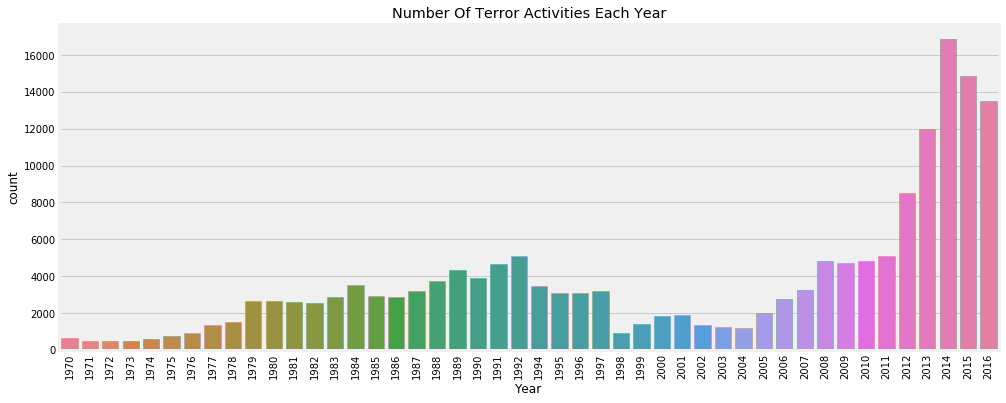

In [13]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=terror,palette='husl',edgecolor=sns.color_palette('husl',8))
plt.xticks(rotation=90)
plt.title('Number Of Terror Activities Each Year')
plt.show()

## the number rapidly increased since 2012.

## there are 2 peaks : (around 1990, and 2014)

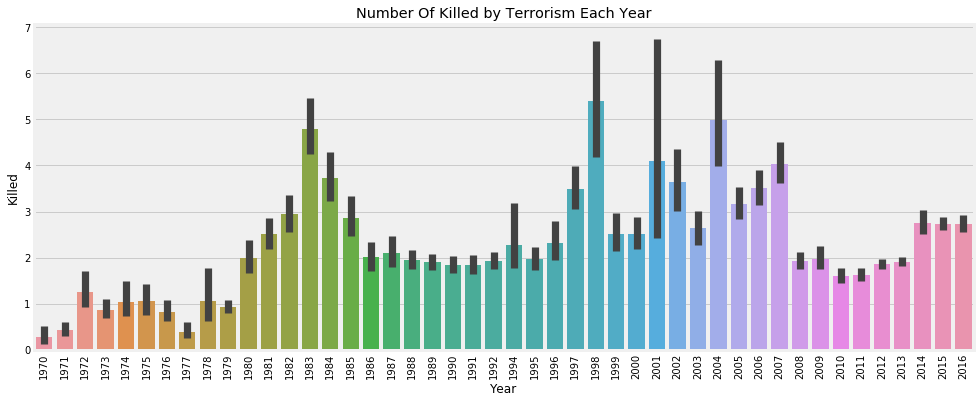

In [14]:
plt.subplots(figsize=(15,6))
sns.barplot(x='Year', y='Killed', data=terror)
plt.xticks(rotation=90)
plt.title('Number Of Killed by Terrorism Each Year')
plt.show()

In [15]:
len(terror.loc[(pd.to_numeric(terror['Killed'])) > 100])

178

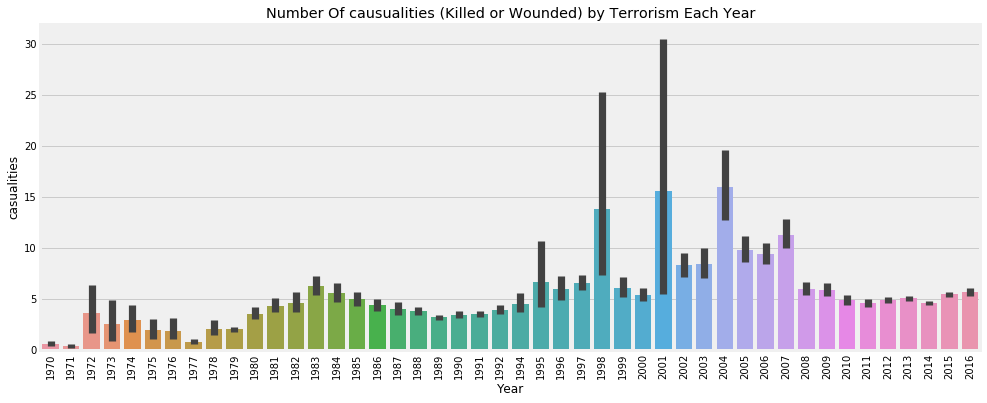

In [16]:
plt.subplots(figsize=(15,6))
sns.barplot(x='Year', y='casualities', data=terror)
plt.xticks(rotation=90)
plt.title('Number Of causualities (Killed or Wounded) by Terrorism Each Year')
plt.show()

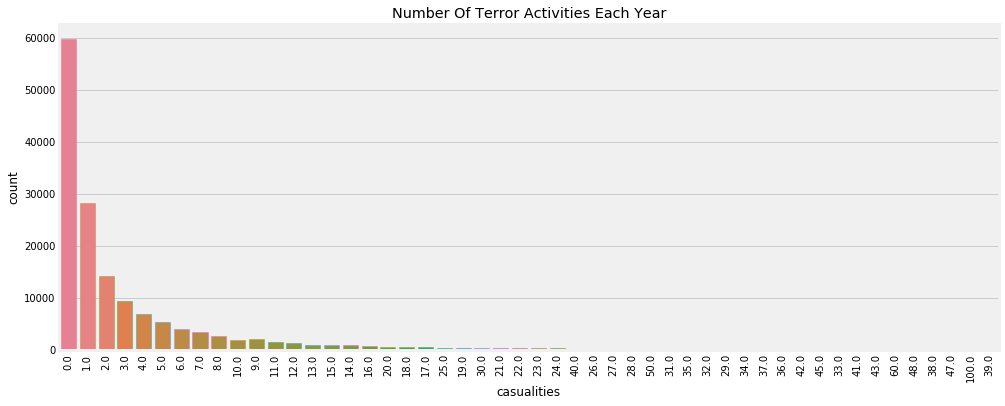

In [17]:
plt.subplots(figsize=(15,6))
sns.countplot('casualities',data=terror,palette='husl',order=terror.Killed.value_counts().iloc[:50].index,edgecolor=sns.color_palette('husl',8))
plt.xticks(rotation=90)
plt.title('Number Of Terror Activities Each Year')
plt.show()

In [18]:
#plt.subplots(figsize=(15,6))
#sns.countplot('AttackType',data=terror,palette='inferno',order=terror['AttackType'].value_counts().index)
#plt.xticks(rotation=90)
#plt.title('Attacking Methods by Terrorists')
#plt.show()

# pre millenium vs post millenium

split dataset into 2 - 1970-2000 and 2001-2016

In [19]:
pre_millenium = terror.loc[terror['Year'] <= 2000]
post_millenium = terror.loc[terror['Year'] > 2000]

## pre millenium

In [20]:
pre_millenium.head(3)

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.432608,-99.133207,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0


In [21]:
print('Country with Highest Terrorist Attacks:',pre_millenium['Country'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',pre_millenium['Region'].value_counts().index[0])
print('Maximum people killed in an attack are:',pre_millenium['Killed'].max(),'that took place in',pre_millenium.loc[pre_millenium['Killed'].idxmax()].Country)

Country with Highest Terrorist Attacks: Colombia
Regions with Highest Terrorist Attacks: South America
Maximum people killed in an attack are: 1180.0 that took place in Rwanda


In [22]:
len(pre_millenium)

71577

In [23]:
post_millenium.head(3)

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
71577,2001,1,0,Colombia,South America,Unknown,3.800889,-76.641271,Unknown,3.0,0.0,Farmers in Valle province,1/8/2001: Paramilitaries killed three farmers ...,Paramilitaries,Private Citizens & Property,Unknown,"Specific motive is unknown; however, authoriti...",3.0
71578,2001,1,1,Yemen,Middle East & North Africa,Aden,12.787916,44.984045,Bombing/Explosion,0.0,0.0,Aden Anglican Church,01/01/2001: The wall of an Anglican Church was...,Unknown,Religious Figures/Institutions,Explosives/Bombs/Dynamite,Unknown,0.0
71579,2001,1,1,Colombia,South America,Bogota district,4.598100,-74.076030,Hostage Taking (Kidnapping),0.0,0.0,Colombian Peasants,01/01/2001: The United Self-defense Forces of ...,United Self Defense Units of Colombia (AUC),Private Citizens & Property,Unknown,The peasants were taken until it could be prov...,0.0


In [24]:
len(post_millenium)

98773

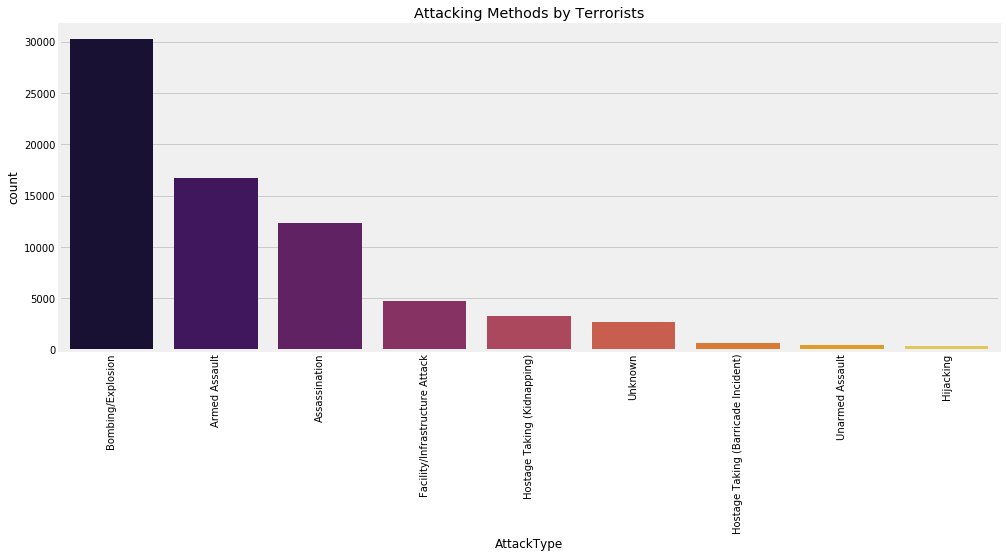

In [25]:
plt.subplots(figsize=(15,6))
sns.countplot('AttackType',data=pre_millenium,palette='inferno',order=pre_millenium['AttackType'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods by Terrorists')
plt.show()

In [26]:
print('Country with Highest Terrorist Attacks:',post_millenium['Country'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',post_millenium['Region'].value_counts().index[0])
print('Maximum people killed in an attack are:',post_millenium['Killed'].max(),'that took place in',post_millenium.loc[post_millenium['Killed'].idxmax()].Country)

Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Maximum people killed in an attack are: 1500.0 that took place in Iraq


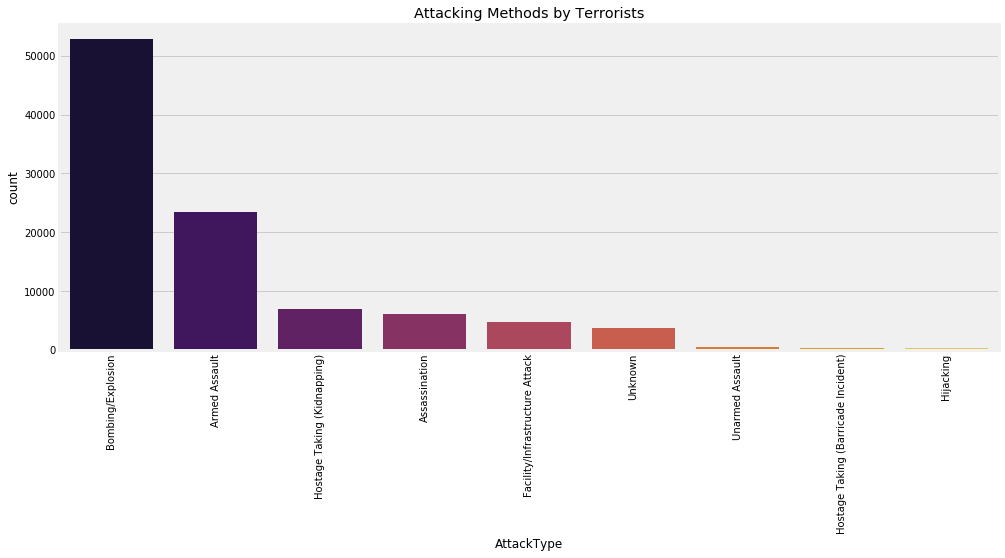

In [27]:
plt.subplots(figsize=(15,6))
sns.countplot('AttackType',data=post_millenium,palette='inferno',order=post_millenium['AttackType'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods by Terrorists')
plt.show()

In [28]:
#pd.crosstab(terror.Region,terror.AttackType).plot.barh(stacked=True,width=1,color=sns.color_palette('RdYlGn',9))
#fig=plt.gcf()
#fig.set_size_inches(12,8)
#plt.show()

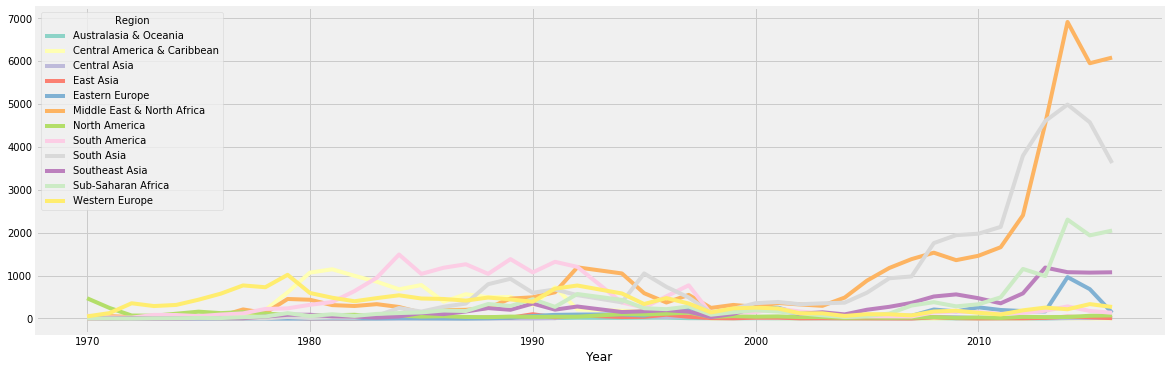

In [53]:
terror_region=pd.crosstab(terror.Year,terror.Region)
terror_region.plot(color=sns.color_palette('Set3',12))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

In [30]:
import nltk
from wordcloud import WordCloud, STOPWORDS

In [31]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/YuriKimura/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [32]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/YuriKimura/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

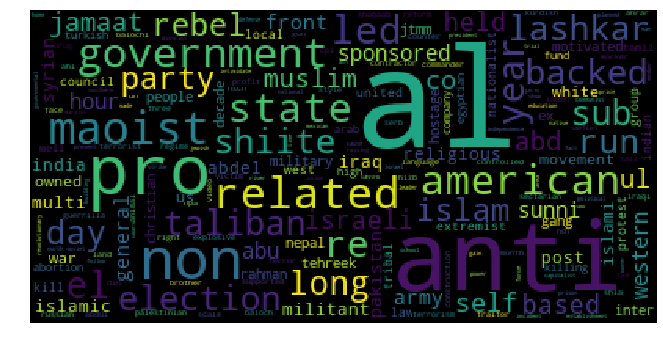

In [33]:
motive=terror['Motive'].str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words=nltk.tokenize.word_tokenize(motive)
word_dist = nltk.FreqDist(words)
stopwords = nltk.corpus.stopwords.words('english')
#f1=open("kaggle.png", "wb")
#f1.write(codecs.decode(kaggle,'base64'))
#f1.close()
#img1 = imread("kaggle.png")
#hcmask1 = img1
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 
#wordcloud = WordCloud(stopwords=STOPWORDS,background_color='black',mask=hcmask1).generate(" ".join(words_except_stop_dist))
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='black').generate(" ".join(words_except_stop_dist))
plt.imshow(wordcloud)
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.axis('off')
plt.show()

# regional analysis

# terrorism in Japan

In [34]:
terror_jpn=terror[terror['Country']=='Japan']

In [35]:
len(terror_jpn)

401

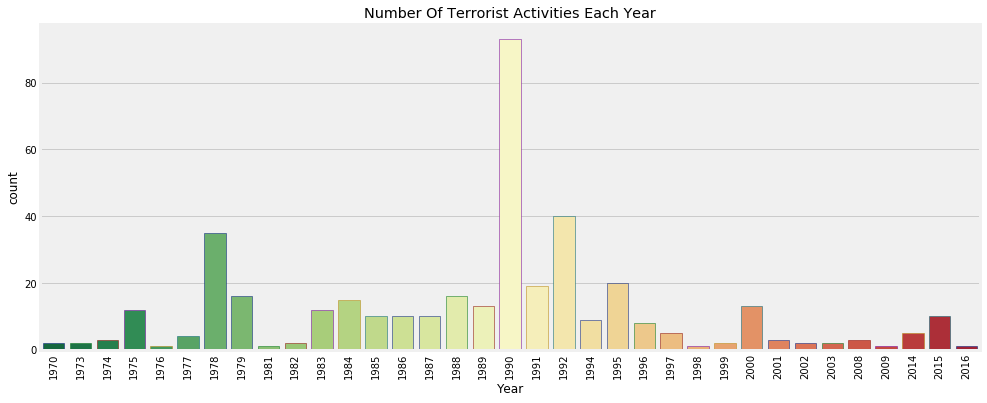

In [36]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=terror_jpn,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

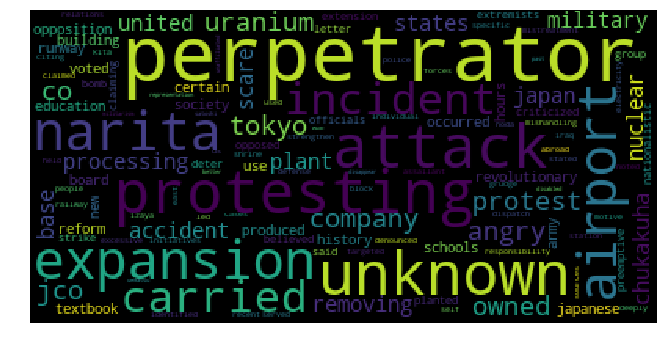

In [37]:
motive=terror_jpn['Motive'].str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words=nltk.tokenize.word_tokenize(motive)
word_dist = nltk.FreqDist(words)
stopwords = nltk.corpus.stopwords.words('english')
#f1=open("kaggle.png", "wb")
#f1.write(codecs.decode(kaggle,'base64'))
#f1.close()
#img1 = imread("kaggle.png")
#hcmask1 = img1
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 
#wordcloud = WordCloud(stopwords=STOPWORDS,background_color='black',mask=hcmask1).generate(" ".join(words_except_stop_dist))
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='black').generate(" ".join(words_except_stop_dist))
plt.imshow(wordcloud)
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.axis('off')
plt.show()

Narita, airport = https://www.nytimes.com/1977/10/04/archives/japanese-hijackers-free-hostages-and-give-themselves-up-in-algiers.html

Sekiho-tai = Nationalist group attacking newspaper company

## The US

In [29]:
terror_usa=terror[terror['Country']=='United States']

In [30]:
len(terror_usa)

2758

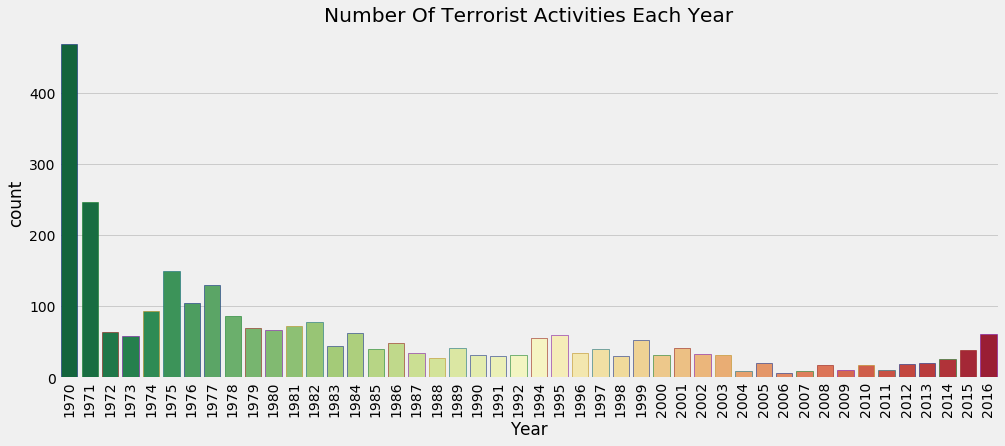

In [31]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=terror_usa,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

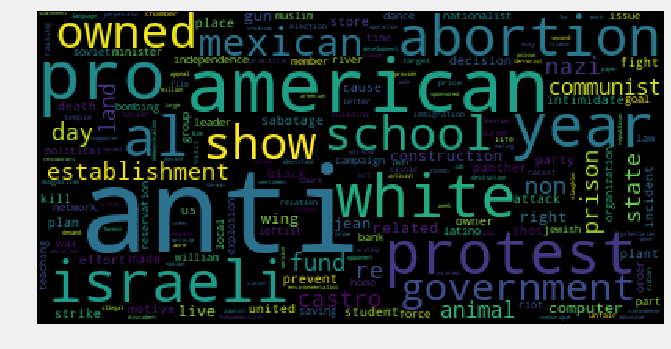

In [32]:
motive=terror_usa['Motive'].str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words=nltk.tokenize.word_tokenize(motive)
word_dist = nltk.FreqDist(words)
stopwords = nltk.corpus.stopwords.words('english')
#f1=open("kaggle.png", "wb")
#f1.write(codecs.decode(kaggle,'base64'))
#f1.close()
#img1 = imread("kaggle.png")
#hcmask1 = img1
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 
#wordcloud = WordCloud(stopwords=STOPWORDS,background_color='black',mask=hcmask1).generate(" ".join(words_except_stop_dist))
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='black').generate(" ".join(words_except_stop_dist))
plt.imshow(wordcloud)
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.axis('off')
plt.show()

## South America 

In [33]:
terror_SA=terror[terror['Region']=='South America']

In [34]:
len(terror_SA)

18762

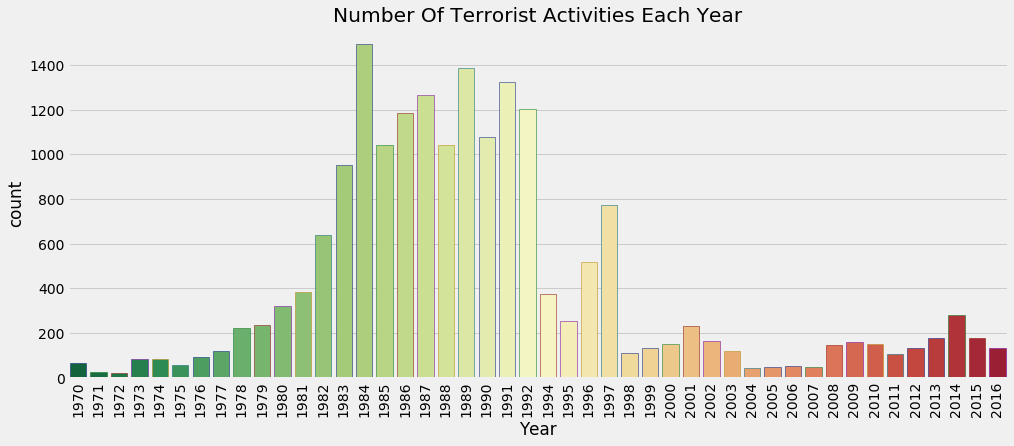

In [35]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=terror_SA,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

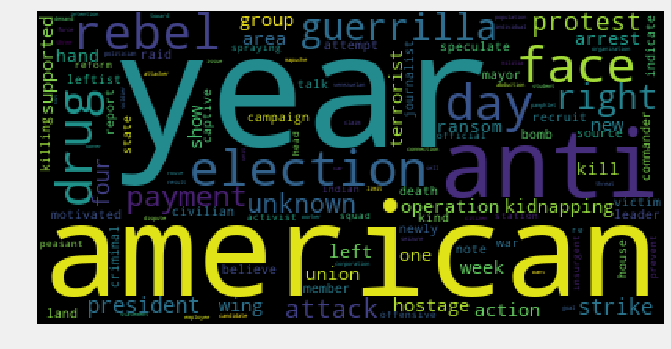

In [36]:
motive=terror_SA['Motive'].str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words=nltk.tokenize.word_tokenize(motive)
word_dist = nltk.FreqDist(words)
stopwords = nltk.corpus.stopwords.words('english')
#f1=open("kaggle.png", "wb")
#f1.write(codecs.decode(kaggle,'base64'))
#f1.close()
#img1 = imread("kaggle.png")
#hcmask1 = img1
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 
#wordcloud = WordCloud(stopwords=STOPWORDS,background_color='black',mask=hcmask1).generate(" ".join(words_except_stop_dist))
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='black').generate(" ".join(words_except_stop_dist))
plt.imshow(wordcloud)
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.axis('off')
plt.show()

## Western Europe

In [37]:
terror_WE=terror[terror['Region']=='Western Europe']

In [38]:
len(terror_WE)

16307

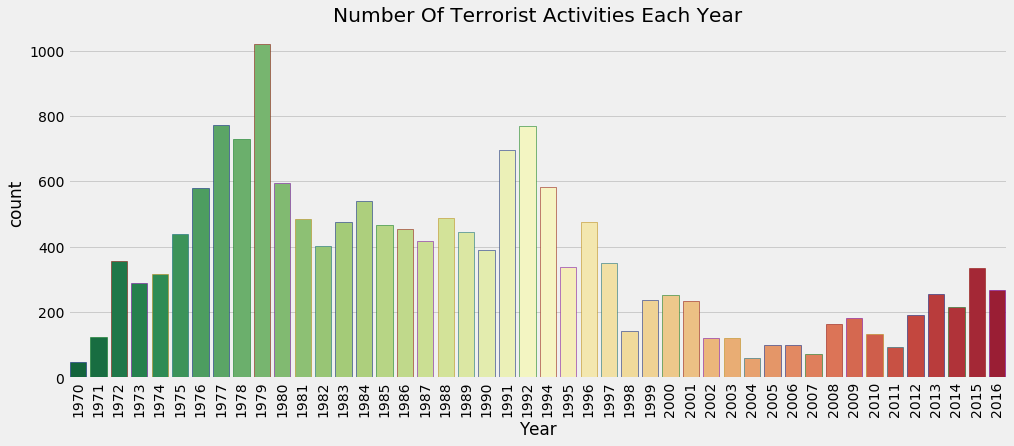

In [39]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=terror_WE,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

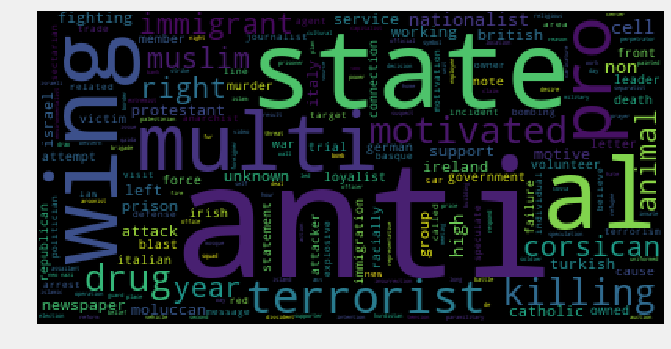

In [40]:
motive=terror_WE['Motive'].str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words=nltk.tokenize.word_tokenize(motive)
word_dist = nltk.FreqDist(words)
stopwords = nltk.corpus.stopwords.words('english')
#f1=open("kaggle.png", "wb")
#f1.write(codecs.decode(kaggle,'base64'))
#f1.close()
#img1 = imread("kaggle.png")
#hcmask1 = img1
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 
#wordcloud = WordCloud(stopwords=STOPWORDS,background_color='black',mask=hcmask1).generate(" ".join(words_except_stop_dist))
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='black').generate(" ".join(words_except_stop_dist))
plt.imshow(wordcloud)
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.axis('off')
plt.show()

# China

In [42]:
terror_china=terror[terror['Country']=='China']

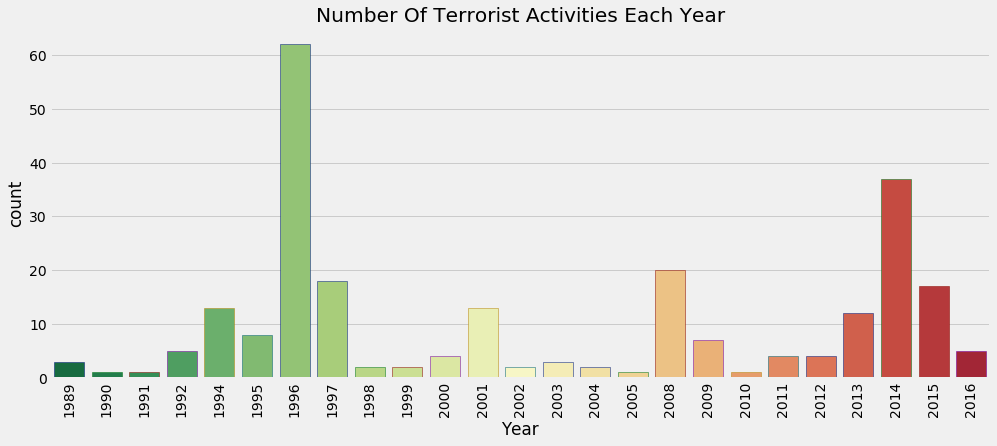

In [43]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=terror_china,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

In [ ]:
# 1996 : Taiwan tentions

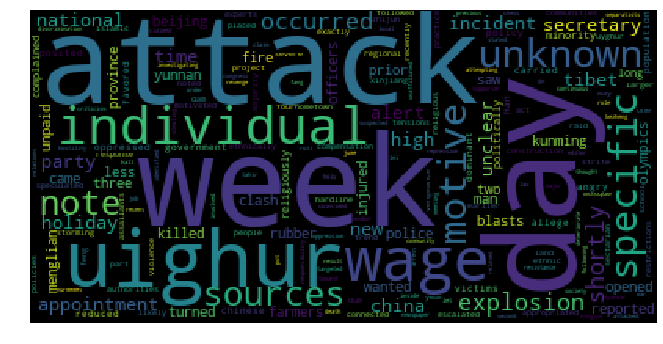

In [85]:
motive=terror_china['Motive'].str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words=nltk.tokenize.word_tokenize(motive)
word_dist = nltk.FreqDist(words)
stopwords = nltk.corpus.stopwords.words('english')
#f1=open("kaggle.png", "wb")
#f1.write(codecs.decode(kaggle,'base64'))
#f1.close()
#img1 = imread("kaggle.png")
#hcmask1 = img1
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 
#wordcloud = WordCloud(stopwords=STOPWORDS,background_color='black',mask=hcmask1).generate(" ".join(words_except_stop_dist))
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='black').generate(" ".join(words_except_stop_dist))
plt.imshow(wordcloud)
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.axis('off')
plt.show()

In [49]:
terror_ME=terror[terror['Region']=='South Asia']

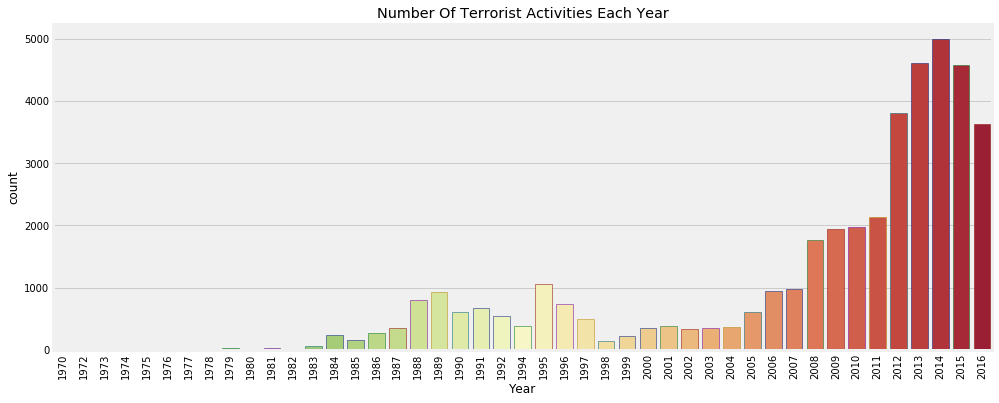

In [50]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=terror_ME,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

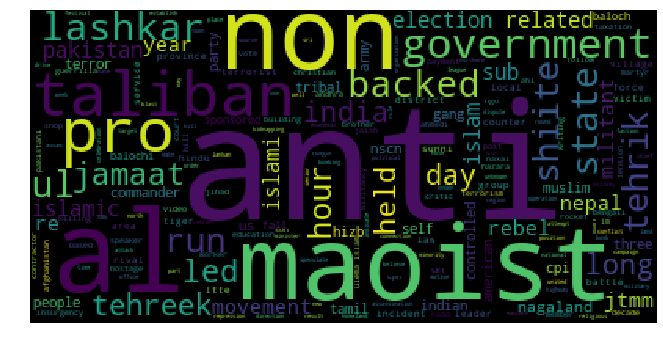

In [51]:
motive=terror_ME['Motive'].str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words=nltk.tokenize.word_tokenize(motive)
word_dist = nltk.FreqDist(words)
stopwords = nltk.corpus.stopwords.words('english')
#f1=open("kaggle.png", "wb")
#f1.write(codecs.decode(kaggle,'base64'))
#f1.close()
#img1 = imread("kaggle.png")
#hcmask1 = img1
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 
#wordcloud = WordCloud(stopwords=STOPWORDS,background_color='black',mask=hcmask1).generate(" ".join(words_except_stop_dist))
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='black').generate(" ".join(words_except_stop_dist))
plt.imshow(wordcloud)
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.axis('off')
plt.show()

In [60]:
terror_libya=terror[terror['Country']=='Libya']